Over the break I wanted to practice some Python skills ... here we go!

# Graphing with two y-axis

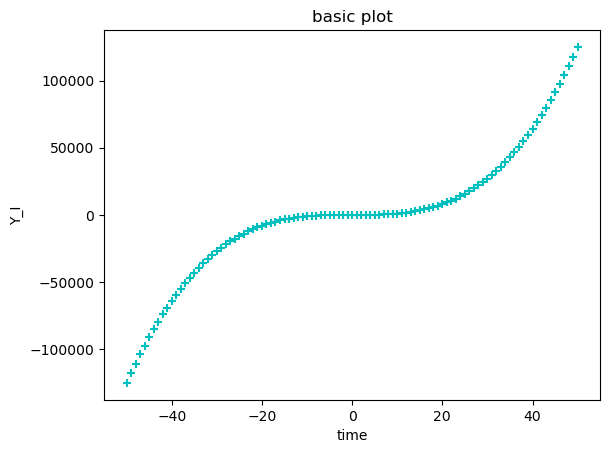

Text(0, 0.5, 'Y_II')

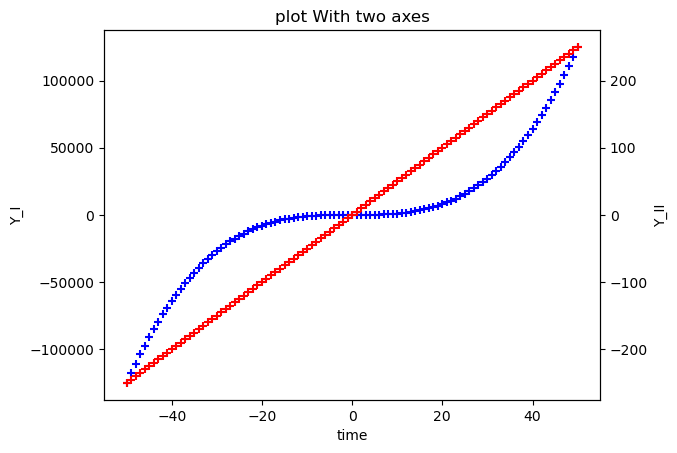

In [23]:
import matplotlib as plt #imports mat plot lib
import matplotlib.pyplot as plt #with some extra needed functions
import numpy as np #imports NP to generate data

t = np.arange (start = -50, stop = 51, step = 1) #this generates our peramenter data, time in this case, from 1 to 100

def func_I (t): #this defiens our function we can use for our first veriable
    y = t**3 + 2 #preformes math on our intput 
    return y #resunts the output

def func_II (t): #we now defien our sectond function
    y = 5*t #we now define our second ouput
    return y #and return it

Y_I = func_I (t)
Y_II = func_II (t) #saves our y data as perameterized by t

plt.scatter (x = t,y= Y_I, c = 'c', marker = '+') #plots a bassic graph
plt.title ("basic plot") #lables title and xy
plt.xlabel("time")
plt.ylabel("Y_I")
plt.show () #shows the actual graph

fig, ax = plt.subplots (1,1) # we want one graph (one row one column)

ax.scatter (x = t, y = Y_I, c = "b", marker ='+') #bassicaly the same as above
ax.set_title ("plot With two axes")
ax.set_xlabel("time")
ax.set_ylabel("Y_I")

ax_II = ax.twinx () #ax II will run off a common x axis with x one
ax_II.scatter (x = t, y = Y_II, c = "r", marker = "+") #now we plot our second line
ax_II.set_ylabel("Y_II") #lables the second y axis

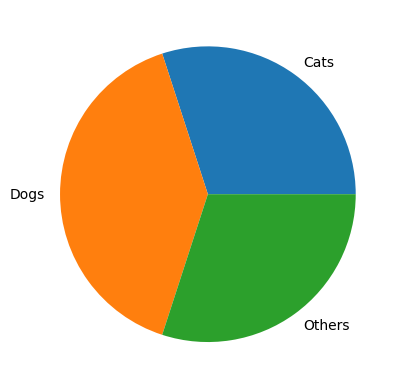

In [39]:
#unrelated
Title = ["Cats", "Dogs", "Others"]
Values = [30,40,30]
plt.pie (Values, labels = Title)
plt.show ()

# Three Dementinal Matplotlib

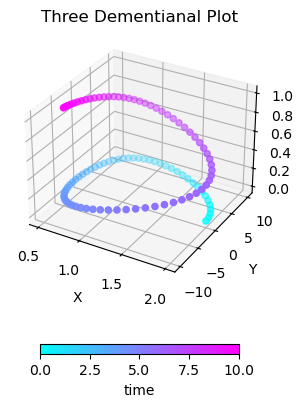

In [98]:
import matplotlib as plt #imports mat plot lib
import matplotlib.pyplot as plt #with some extra needed functions
import numpy as np #imports NP to generate data

#now we can generate some data
t = np.linspace (0,10,100) #creates a perameter from 0 to 10 with quarter steps

x = 2 ** (np.cos(t)) #we generate x,y,z data based on the perameter

y = np.sin (t) * 10 

z = t**2 / 100

fig, ax = plt.subplots (subplot_kw = {"projection" : "3d"}) #note the three d projection (I think there are a few options to do this)
 #see the next cell for another example
p = ax.scatter (x,y,z, c = t, cmap = "cool") #we scatter our data, note we can only use the t as a colour perameter because we have a colour map
ax.set_title ("Three Dementianal Plot") #titles and lables
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
fig.colorbar (p, label = "time", location = 'bottom', shrink = 0.4) #takes fig 
plt.savefig ("heat_fig_1") #saves the  figure as a png
plt.show () #takes plt


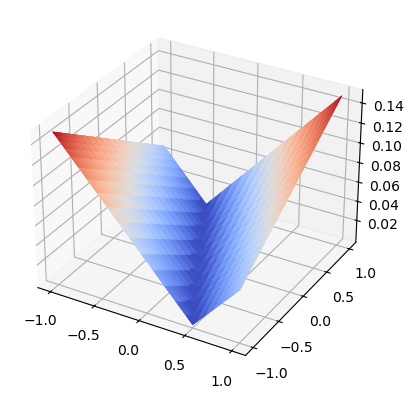

In [69]:
#now we can do one with a surface
import matplotlib as plt #imports mat plot lib
import matplotlib.pyplot as plt #with some extra needed functions
import numpy as np #imports NP to generate data

from mpl_toolkits import mplot3d #this enables us to do more intresting things in 3D

from matplotlib import cm #this gives us more colours

Theta = np.linspace (0,2 * np.pi, 500) #creates a perameter

X = np.cos (Theta) #x data
Y = X #y data too
X,Y = np.meshgrid (X,Y) #combines them into a marix rather than two arraies
Z = np.sqrt ((0.1 * X + 0.05 * Y) ** 2) #creates a two D z function

ax = plt.figure ().add_subplot (projection = '3d') #YOU CANNOT DO THREE D WITHOUT THIS LINE, MUST BE DONE AS SUBPLOT

ax.plot_surface (X,Y,Z, cmap = cm.coolwarm) #notability cmap can't work with theta here, false cmap
plt.show ()

# Graphing with errors

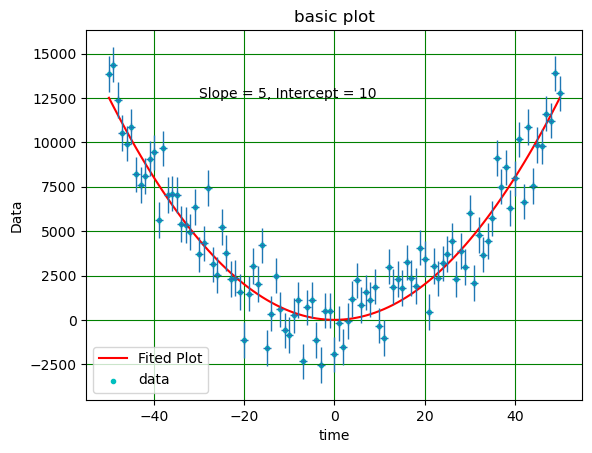

In [36]:
import matplotlib as plt #imports mat plot lib
import matplotlib.pyplot as plt #with some extra needed functions
import numpy as np #imports NP to generate data

#first, a simple two d plot

t = np.arange (start = -50, stop = 51, step = 1) #this generates our peramenter data, time in this case, from 1 to 100

y = 5 * t**2 + 10 + np.random.normal (0,1500,len (t)) #generates the data plus a random veriable from a normal distributions
Y_fit = 5 * t**2 + 10 #generates the proper data we will use to fit to the plot 

plt.plot (t,Y_fit, c = 'r', label ='Fited Plot') #now we fit the plot
plt.scatter (t,y, c = 'c', marker = '.', label = "data") #plots a bassic graph
plt.errorbar (x = t, y = y, yerr = 1000,xerr = 0, marker = '+', lw = 1, linestyle = 'None')
plt.title ("basic plot") #lables title and xy
plt.xlabel("time")
plt.ylabel("Data")
plt.text (x = -30, y = 12500, s ="Slope = 5, Intercept = 10")
plt.legend ()
plt.grid (axis = 'both',which = "major",color = 'g', zorder = 1) #makes all the grids appear in the backround
plt.show () #shows the actual graph

# Gif Graph

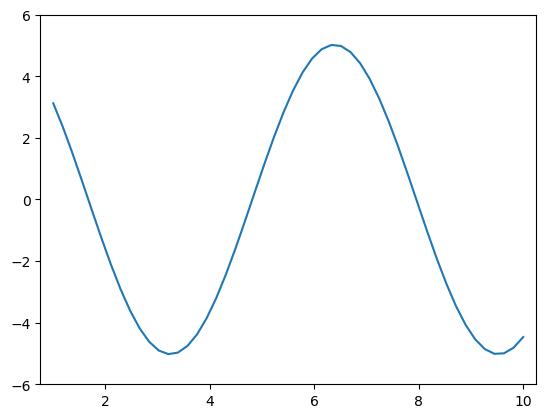

In [10]:
import matplotlib as plt #imports mat plot lib  #Also refer to JCP265 lec and pra 9
import matplotlib.pyplot as plt #with some extra needed functions
import numpy as np #imports NP to generate data
from matplotlib.animation import PillowWriter #this inmports the animation function we will use


#first we define a peremeter
t = np.linspace (1, 10, 50) #ten second simulation with 50 frames

θ = 5 * np.cos (t) + 0.5 * np.sin (t) #we find a set of data

fig = plt.figure () #set a figure, dpi is pixcel count

Empty, = plt.plot ([], []) #we create an empty plot we will add the data to as we go

writer = PillowWriter (fps = 5) #this starts the writer running at fps = 5 (for quicker load times)

plt.xlim (0.75, 10.25) #set the limits here as we won't instantly have the data to do it automatically
plt.ylim (-6,6)

x_data = [] #these are empty listes we will save the data to as we graph
y_data = []

with writer.saving (fig, outfile = "./Gif_Sim.gif", dpi = 100): #this starts the actual graphing prosses, outfule is save name
    for i in range (len (θ)): #loops through the data we saved
        x_data.append (t[i])
        y_data.append (θ[i])

        Empty.set_data (x_data,y_data) #graphs the data as we loop through it
        
        writer.grab_frame () #prints